In [1]:
import pandas as pd

In [2]:
#Load in the dataframes

sd_all = pd.read_csv('/data100t1/home/egfrankel/anorexia/phecode_enrichment/SD_all_matches/output/sd_out_all_merged_sig_after_filt_offline.txt', sep = '\t')

mgb_all = pd.read_csv('/data100t1/home/egfrankel/anorexia/phecode_enrichment_mgb/all_output.frequencies_and_pvals_matched_forty_sig_sig_only.txt', sep = '\t')

geisinger_all = pd.read_csv('/data100t1/home/egfrankel/anorexia/Geisinger_Replication/all_output.frequencies_and_pvals_matched_forty_sig_offline.txt', sep = '\t')

In [7]:
print("Here are SD Value Counts for ALL")
print(sd_all['category'].value_counts())


print('\n')

print("Here are MGB Value Counts for ALL")
print(mgb_all['category'].value_counts())

print('\n')

print("Here are Geisinger Value Counts for ALL")
print(geisinger_all['category'].value_counts())

Here are SD Value Counts for ALL
category
endocrine/metabolic        46
mental disorders           43
digestive                  34
genitourinary              30
respiratory                27
misc                       25
symptoms                   22
sense organs               22
circulatory system         20
neurological               19
dermatologic               18
injuries & poisonings      18
musculoskeletal            16
hematopoietic              12
infectious diseases         3
neoplasms                   3
pregnancy complications     1
Name: count, dtype: int64


Here are MGB Value Counts for ALL
category
digestive                  69
genitourinary              69
injuries & poisonings      59
circulatory system         57
endocrine/metabolic        54
mental disorders           53
musculoskeletal            51
neurological               45
sense organs               42
dermatologic               40
respiratory                40
symptoms                   28
infectious diseas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [11]:
sd_all

,phecode,pval,case_freq,phenotype,phecode_exclude_range,category_number,category
0,8.0,0,0.047733,NaN,NaN,NaN,misc
1,8.6,0,0.031026,NaN,NaN,NaN,misc
2,41.0,0,0.073389,NaN,NaN,NaN,misc
3,60.0,0,0.074582,NaN,NaN,NaN,misc
4,78.0,0,0.033413,NaN,NaN,NaN,misc
...,...,...,...,...,...,...,...
354,965.1,0,0.030430,Opiates and related narcotics causing adverse ...,960-979.99,18.0,injuries & poisonings
355,967.0,0,0.030430,Adverse effects of sedatives or other central ...,960-979.99,18.0,injuries & poisonings
356,969.0,0,0.049523,Poisoning by psychotropic agents,960-979.99,18.0,injuries & poisonings
357,977.0,0,0.062053,Personal history of allergy to medicinal agents,960-979.99,18.0,injuries & poisonings


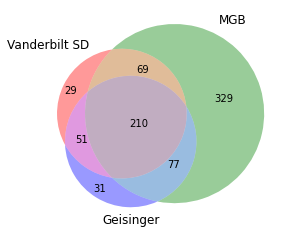

In [13]:
#Make Venn Diagram
# Convert lists to sets
sd_set = set(sd_all['phecode'])  
mgb_set = set(mgb_all['phecode'])
geisinger_set = set(geisinger_all['phecode'])

# Calculate regions for the Venn diagram
only_sd = len(sd_set - mgb_set - geisinger_set)  # only sd phecodes
only_mgb = len(mgb_set - sd_set - geisinger_set)  # only mgb phecodes
only_geisinger = len(geisinger_set - sd_set - mgb_set)  # only geisinger phecodes
sd_and_mgb = len(sd_set & mgb_set - geisinger_set)  # sd and mgb
sd_and_geisinger = len(sd_set & geisinger_set - mgb_set)  # sd and geisinger
mgb_and_geisinger = len(mgb_set & geisinger_set - sd_set)  # mgb and geisinger overlap
all_three = len(sd_set & mgb_set & geisinger_set)  # IDs in all three sets

# Create the Venn diagram
venn = venn3(
    subsets=(only_sd, only_mgb, sd_and_mgb, only_geisinger, sd_and_geisinger, mgb_and_geisinger, all_three),
    set_labels=('Vanderbilt SD', 'MGB', 'Geisinger')
)
plt.show()